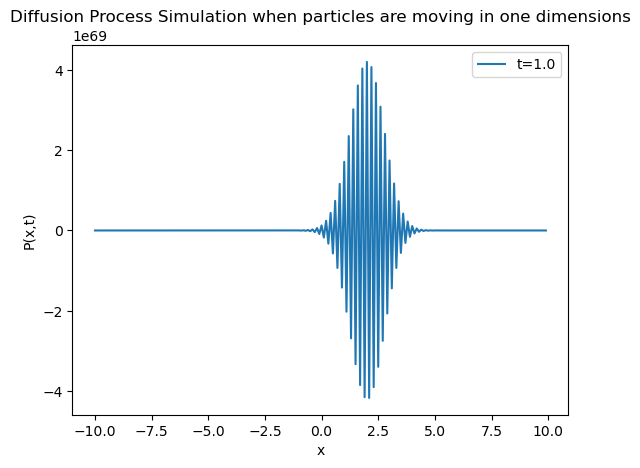

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
D = 1.0  # Diffusion coefficient
x_max = 10  # Maximum x value for simulation
dx = 0.1  # Step size in x
dt = 0.01  # Time step
t_max = 1.0  # Maximum time for simulation

# Create an array for x values
x_values = np.arange(-x_max, x_max, dx)

# Initialize the probability distribution P(x,0)
P = np.zeros(len(x_values))
P[len(x_values)//2] = 1/dx  # Delta function at t=0

# Define the function to update P using the diffusion equation
def update_P(P, D, dx, dt):
    dP_dt = D * np.diff(P, 2) / dx**2  #Solution of the diffusion equation
    return P[:-2] + dP_dt * dt

# Run the simulation
time_steps = int(t_max / dt)
for _ in range(time_steps):
    P = update_P(P, D, dx, dt)
    P = np.insert(P, 0, 0)  # Maintain the array size
    P = np.append(P, 0)

# Plot the results
plt.plot(x_values, P, label=f't={t_max}')
plt.xlabel('x')
plt.ylabel('P(x,t)')
plt.title('Diffusion Process Simulation when particles are moving in one dimensions')
plt.legend()
plt.show()


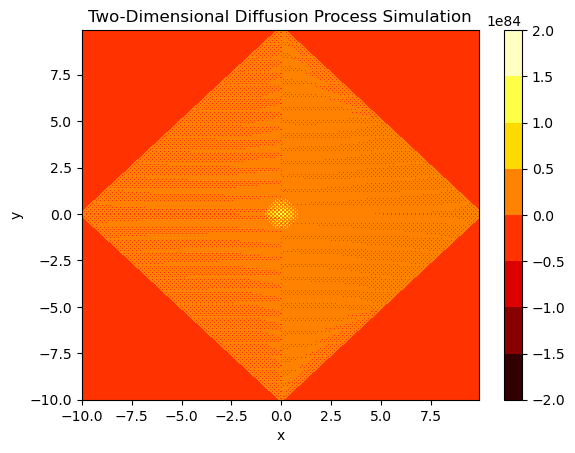

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
D = 1.0  # Diffusion coefficient
x_max, y_max = 10, 10  # Maximum x and y values for simulation
dx, dy = 0.1, 0.1  # Step sizes in x and y
dt = 0.01  # Time step
t_max = 1.0  # Maximum time for simulation

# Create arrays for x and y values
x_values = np.arange(-x_max, x_max, dx)
y_values = np.arange(-y_max, y_max, dy)
X, Y = np.meshgrid(x_values, y_values)

# Initialize the probability distribution P(x,y,0)(This represents the initial state of the system
#                                                  ,where all particles are concentrated at the origin.)
P = np.zeros((len(y_values), len(x_values)))
P[len(y_values)//2, len(x_values)//2] = 1/(dx*dy)  # Delta function at t=0

# Define the function to update P using the diffusion equation
def update_P(P, D, dx, dy, dt):
    dP_dx2 = (np.roll(P, -1, axis=1) - 2*P + np.roll(P, 1, axis=1)) / dx**2
    dP_dy2 = (np.roll(P, -1, axis=0) - 2*P + np.roll(P, 1, axis=0)) / dy**2
    return P + D * (dP_dx2 + dP_dy2) * dt

# Run the simulation
time_steps = int(t_max / dt)
for _ in range(time_steps):
    P = update_P(P, D, dx, dy, dt)

# Plot the results
plt.contourf(X, Y, P, cmap='hot')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Two-Dimensional Diffusion Process Simulation')
plt.show()


#### Keypoints from the simulation.
 ##### 1.Colour Intensity:
        *The bright yellow area at the center of the graph represents the highest concentration of particles.
        *This is likely where the particles were initially concentrated at the start of the simulation (t=0)
 ##### 2.Spread:
        *Particles are moving from areas of high concentration to areas of lower concentration.
        *The chart above shows that initially all the particles are concentrated at the centre and as the time passes they 
         are diffusing towards lower concentration area .and the distrubution is following gaussian normal distribution.